In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

c:\Users\Srikar\.conda\envs\pytorchdev\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Srikar\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


In [4]:
import pandas as pd

col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv(f"{path}" + "/diabetes.csv", sep=",", names=col_names)

In [5]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [6]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] 
y = pima.label

In [7]:
import matplotlib.pyplot as plt

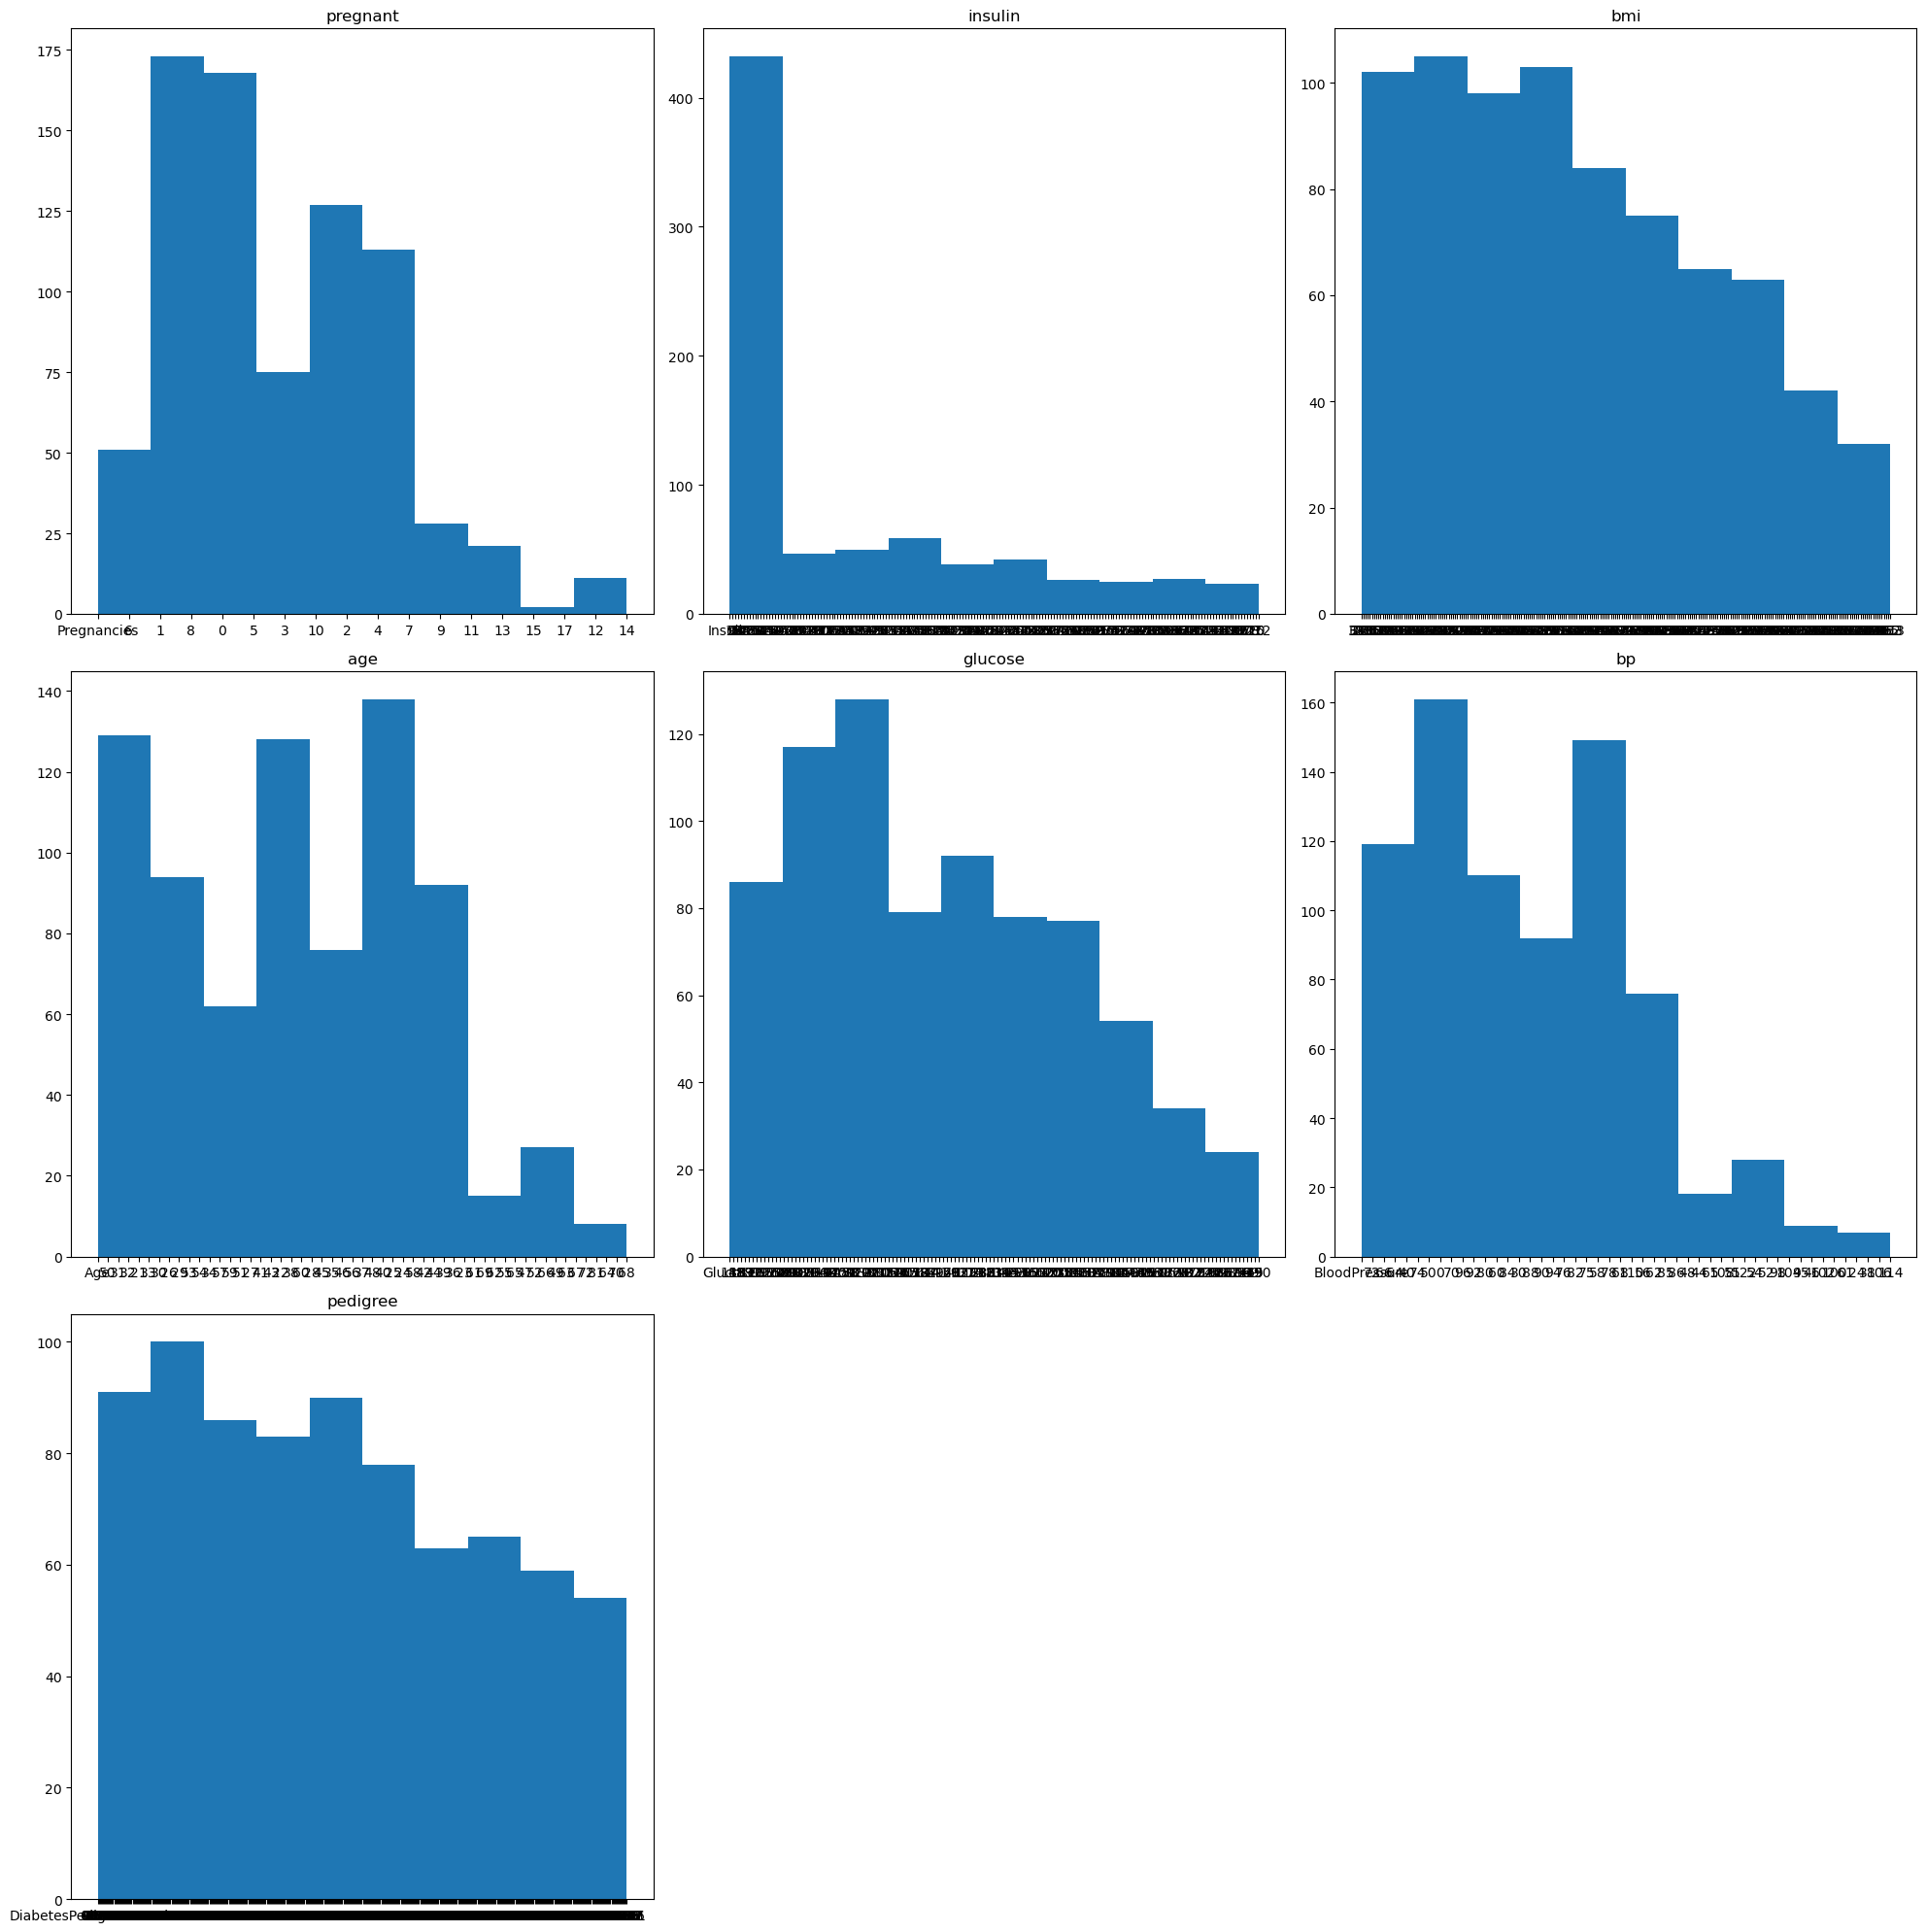

In [35]:
fig = plt.figure(figsize = (20,20))
for n, col in enumerate(feature_cols):
    plt.subplot(3,3, n+1)
    plt.hist(X[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
import numpy as np

In [ ]:
class LogisticRegression:
    def __init__(self, learning_rate, iterations):
        self.learning_rate = learning_rate
        self.iterations = iterations
    
    def fit(self, X, y):
        self.m, self.n = X.shape
        self.W = np.zeros(self.n)
        self.b = 0
        self.X = X
        self.y = y


        for i in range(self.iterations):
            self.updateWeights()
        return self
    
    def updateWeights(self):
        sigmoid = 1 / ( 1 + np.exp(-(self.X.dot( self.W ) + self.b)))

        tmp = (sigmoid - self.y.T)
        tmp = np.reshape(tmp, self.m)
        dW = np.dot( self.X.T, tmp ) / self.m
        db = np.sum( tmp ) / self.m
          
        # update weights     
        self.W = self.W - self.learning_rate * dW     
        self.b = self.b - self.learning_rate * db 
          
        return self